<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_6_lesson/textclassification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Класифікація текстів за допомогою scikit-learn

Класифікація тексту - це фундаментальне завдання в обробці природної мови (NLP), яке полягає в автоматичному розподілі текстових даних на заздалегідь визначені класи. Scikit-learn надає потужний інструментарій для побудови та оцінки моделей класифікації тексту. Цей посібник ознайомить вас з основами класифікації тексту за допомогою scikit-learn, включаючи TF-IDF, n-грами та ключові параметри.

# TF-IDF: Зважування слів за важливістю

* **Термін Frequency (TF):** TF підраховує, як часто слово з'являється в документі. Однак, слово, що часто зустрічається в короткому документі, може бути не настільки важливим.
* **Зворотна частота документа (IDF):** IDF враховує, наскільки часто слово зустрічається в усіх документах у корпусі. Слова, що з'являються в багатьох документах, матимуть нижчий показник IDF, що зменшує їхню вагу.
* **TF-IDF:** Поєднує TF і IDF, надаючи більшу вагу словам, які часто зустрічаються в документі, але рідко в усьому корпусі. Ці слова, ймовірно, є більш інформативними для класифікації.

## Приклад:

Розглянемо два документи:

* **Документ 1:** «The quick brown fox jumps over the lazy dog.»
* **Документ 2:** «The dog is lazy.»

Слова «the» та «is» є частими для кожного речення окремо, але з'являються в багатьох документах (висока частота вживання), що зменшує їхню вагу в TF-IDF. Такі слова, як «quick» і «lazy», можуть мати нижчий TF, але вищий IDF через їхню рідкісність, що призводить до вищого показника TF-IDF.


Нижче наведено приклад обчислення TF-IDF для реченнь

* **A:** «The car is driven on the road»
* **B:** «The truck is driven on the highway»

![](https://media.licdn.com/dms/image/D4D12AQF8sI1V68UsIQ/article-cover_image-shrink_600_2000/0/1677509695129?e=2147483647&v=beta&t=pDHLFUdBEFMD3q6K0eNgg_C_zPYYYxikomIN00cfTuo)

# N-грами:

* **Що таке n-грами?** N-грами - це послідовності з n слів, які з'являються разом у тексті. Уніграми - це окремі слова, біграми - послідовності з 2 слів (наприклад, «швидкий коричневий»), а триграми - послідовності з 3 слів (наприклад, «швидка коричнева лисиця»).

* **Чому n-грами?** Окремих слів не завжди достатньо для класифікації. N-грами можуть фіксувати значущі фрази та словосполучення, які підвищують точність класифікації. Наприклад, «швидка коричнева лисиця» може бути більш показовою для певної теми, ніж просто «швидка» або «коричнева».

![](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

# TfidfVectorizer

[Документація](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

Scikit-learn `TfidfVectorizer` допомагає перетворити текстові дані у вектори TF-IDF, придатні для моделей машинного навчання. Ось деякі ключові параметри:

**Загальні параметри:**

* **ngram_range:** (кортеж, за замовчуванням=(1, 1)) Визначає діапазон n-грам для розгляду. Наприклад, `(1, 1)` використовує уніграми (окремі слова), `(1, 2)` використовує уніграми та біграми (послідовності з 2 слів), і так далі.
* **max_features:** (int, default=None) Обмежує розмір словника, зберігаючи найчастотніші слова. Менше значення може підвищити ефективність, але може призвести до відкидання потенційно інформативних слів.
* **stop_words:** (list або str, за замовчуванням=Ні) Визначає стоп-слова (загальні слова, такі як «the», «a»), які слід вилучити зі словника. Ви можете вказати власний список або скористатися вбудованими англійськими стоп-словами (`'english'`).

**Параметри нормалізації:**

* **use_idf:** (bool, за замовчуванням=True) Цей параметр визначає, чи використовувати зважування TF-IDF. Встановіть значення `False` для використання лише частоти термінів (TF).
* **smooth_idf:** (bool, default=True) Застосовує згладжування до ваг IDF, щоб уникнути нулів для рідкісних слів.
* **sublinear_tf:** (bool, default=True) Застосовує сублінійне масштабування частоти термів для зменшення впливу дуже частих слів.

**Інші параметри:**

* **norm:** (str, за замовчуванням='l2') Визначає схему нормалізації для векторів TF-IDF. Найпоширеніші варіанти включають:
    * `'l2'`: Одинична норма (вектори мають сумарну величину 1).
    * `'l1'`: Сума абсолютних значень елементів вектора дорівнює 1.
* **analyzer:** (str, за замовчуванням='word') Визначає одиницю аналізу. Можливі варіанти:
    * ``word``: Токенізація на основі пробілів.
    * ``char`` : Токенізація за символами.

# PCA

У машинному навчанні, особливо при роботі з великими наборами даних, кількість ознак (змінних) іноді може стати тягарем. Саме тут в нагоді стають методи зменшення розмірності. Вони спрямовані на зменшення кількості ознак при збереженні більшої частини важливої інформації з даних.

**Розуміння зменшення розмірності:**

Уявіть собі набір даних із сотнями елементів, що описують зображення. Хоча це може здатися всеосяжним, це також може бути обчислювально дорогим і потенційно призвести до надмірної підгонки. Методи скорочення ознак допомагають нам знайти менший набір ознак, які ефективно представляють дані, що призводить до:

* **Підвищення ефективності:** Навчальні моделі з меншою кількістю ознак, як правило, працюють швидше і вимагають менше обчислювальних ресурсів.
* **Зменшення надмірного припасування:** З меншою кількістю ознак модель з меншою ймовірністю запам'ятовує специфічні закономірності в навчальних даних і може краще узагальнювати невидимі дані.

## Що таке PCA (аналіз головних компонент)?

PCA, або аналіз головних компонент, є популярною технікою зменшення розмірності. Він аналізує дисперсію в даних і визначає новий набір ознак, які називаються головними компонентами (ГК), що охоплюють більшу частину інформації. Ці ПК є некорельованими і впорядковані за величиною дисперсії, яку вони пояснюють.

**Пояснена дисперсія:**

Дисперсія показує, наскільки розподілені дані за певною ознакою. Пояснена дисперсія в контексті PCA означає частку загальної дисперсії даних, яку пояснює певна головна компонента. Перша головна компонента пояснює найбільшу дисперсію, за нею йде друга і так далі.

![](https://starship-knowledge.com/wp-content/uploads/2020/11/pca_principle-1024x724.jpeg)

## Параметри PCA

Scikit-learn забезпечує зручну для користувача реалізацію PCA. Ось розбивка деяких ключових параметрів:

* **n_components:** (int, default=None) Тут вказується бажана кількість головних компонент для збереження. Якщо значення None, зберігаються всі компоненти. Ви можете вибрати конкретну кількість або використати пояснені порогові значення відношення дисперсій.
* **svd_solver:** (str, за замовчуванням='auto') Тут вказується алгоритм, який використовується для декомпозиції. Можливі варіанти:
    * ``full``: Виконує повне розкладання SVD (Singular Value Decomposition), яке може бути повільнішим для великих наборів даних.
    * ``arpack``: Використовує розв'язувач ARPACK, підходить для менших наборів даних.
    * ``рандомізований``: Використовує рандомізований алгоритм, ефективний для великих наборів даних.
* **whiten:** (bool, default=False) Виконує відбілювання після PCA, який масштабує головні компоненти так, щоб вони мали одиничну дисперсію.

**Вибір параметрів PCA:**

* **Кількість компонент:** Часто ви можете вибрати кількість компонент на основі поясненого відношення дисперсій. Загальним емпіричним правилом є збереження компонент, які пояснюють сукупно 80-90% дисперсії.
* **svd_solver:** Виберіть розв'язувач на основі розміру вашого набору даних та обчислювальних ресурсів.
* **Відбілювання:** Відбілювання може бути корисним для певних алгоритмів, які припускають одиничну дисперсію для ознак.

# Дані

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/bbc_data.csv")
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [2]:
from sklearn.model_selection import train_test_split

X = df['data']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

## Обробка даних

In [3]:
class MyTokenizer:
     def __init__(self):
         self.some_args = None
     def __call__(self, text):
         return text.split()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=MyTokenizer(), stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
X_train

<1780x52781 sparse matrix of type '<class 'numpy.float64'>'
	with 296296 stored elements in Compressed Sparse Row format>

In [6]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(1286+1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [7]:
pca.explained_variance_ratio_.sum()

0.8971162942726689

In [8]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 0.9)

(array([], dtype=int64),)

In [9]:
X_train.shape

(1780, 1287)

In [10]:
(X_train == 0).sum()

0

## [Модель](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## Результат

In [16]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.95      0.95      0.95       102
entertainment       0.97      0.95      0.96        77
     politics       0.94      0.98      0.96        84
        sport       1.00      1.00      1.00       102
         tech       0.99      0.97      0.98        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



[]

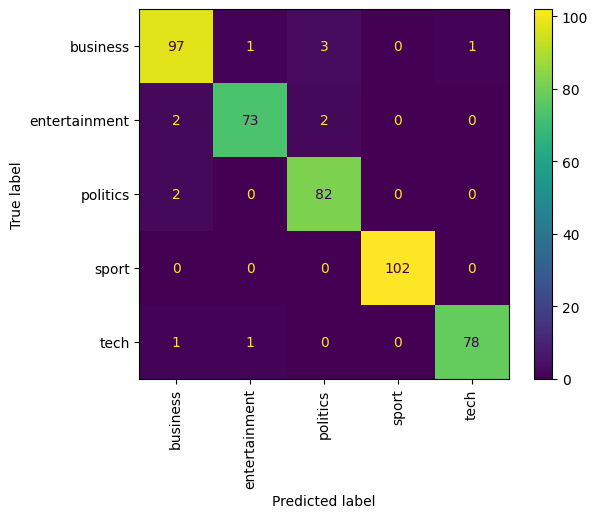

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

## Остаточна модель

In [14]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x7c095f32a650>)),
                ('pca', TruncatedSVD(n_components=1287)),
                ('model', LogisticRegression(class_weight='balanced'))])